In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Sakthi\Desktop\PROJECT\Capstone\Reviews (1) (1).csv')

In [3]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df1=df

In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


**Most of the score has been around 5 which shows good reviews on product.**

In [8]:
df1['UserId'].nunique()

256059

In [9]:
df1['ProfileName'].nunique()

218416

In [10]:
df1['ProductId'].nunique()

74258

In [11]:
for i in range(5):
 print(f"Review item {i+1}")
 print(f"SUmmary: {df['Summary'][i]}")
 print(f"Text : {df['Text'][i]}\n")


Review item 1
SUmmary: Good Quality Dog Food
Text : I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Review item 2
SUmmary: Not as Advertised
Text : Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Review item 3
SUmmary: "Delight" says it all
Text : This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The W

In [12]:
df1.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

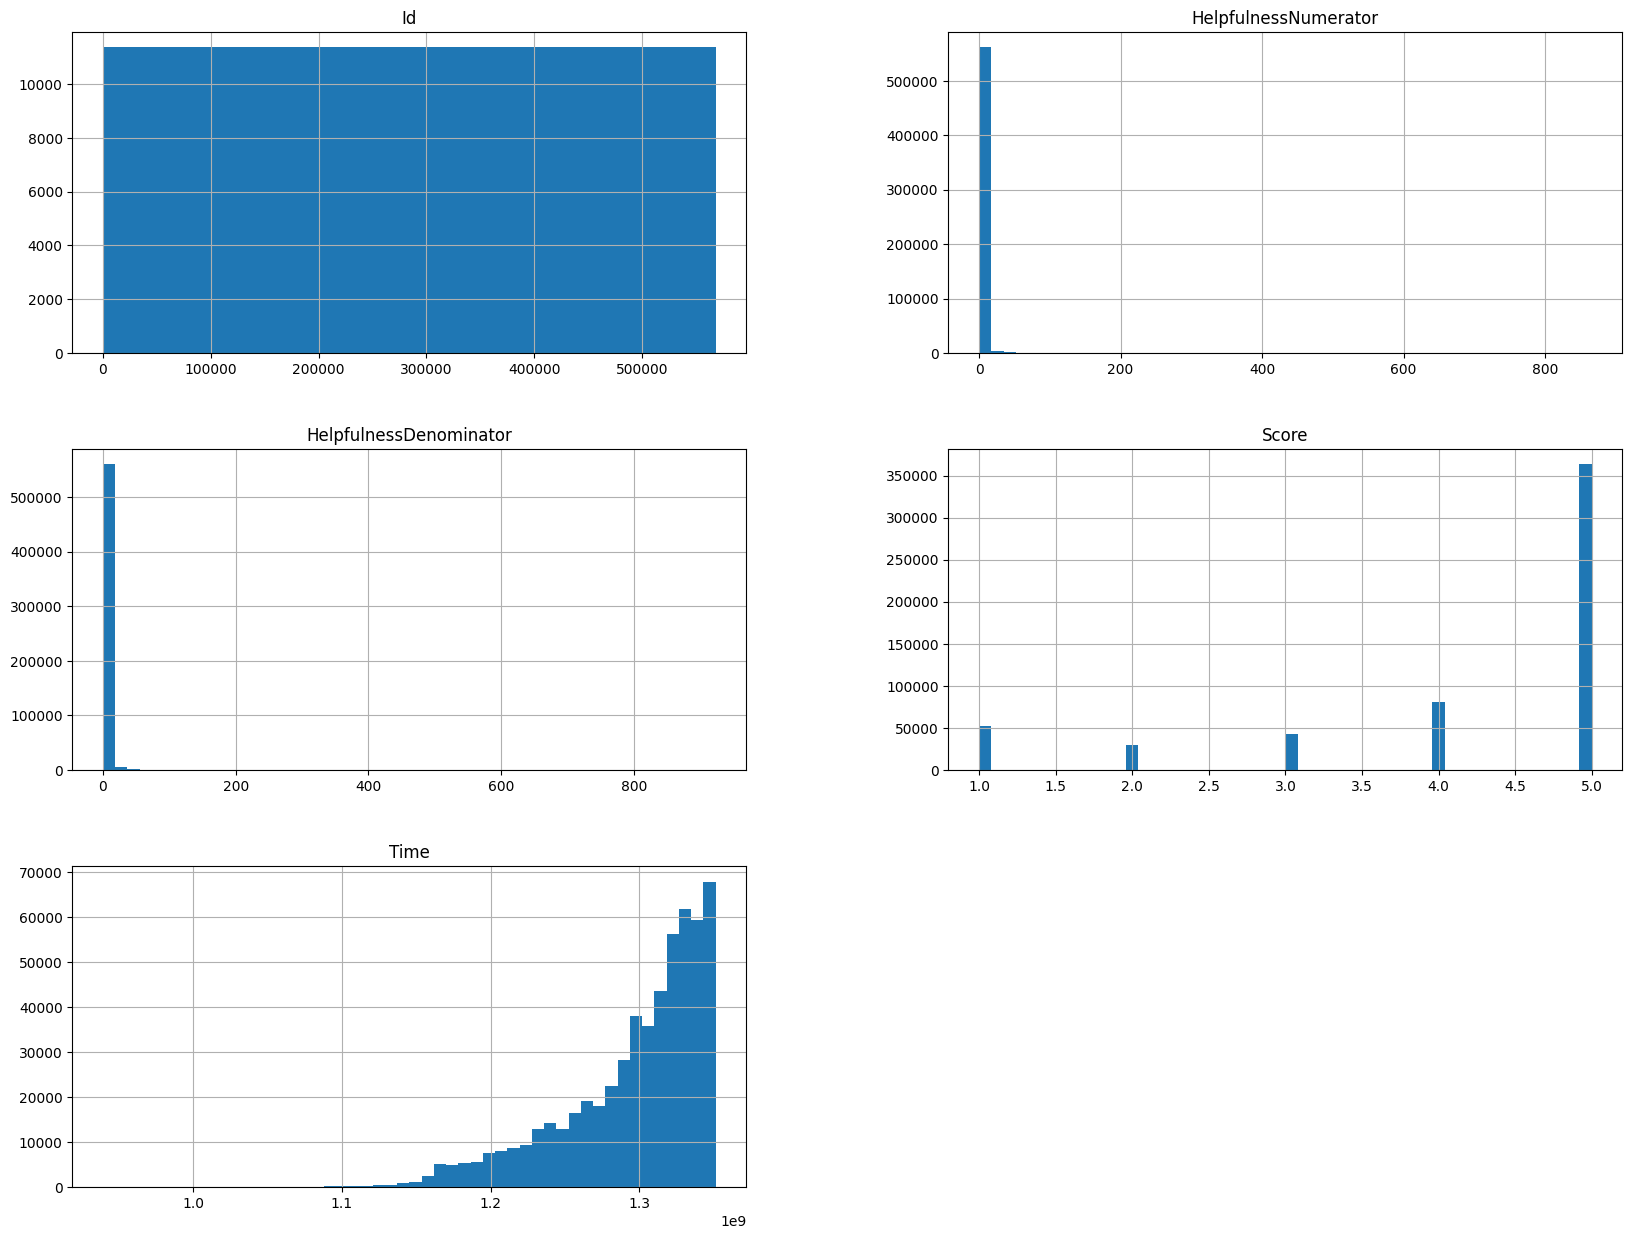

In [13]:
df1.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

In [14]:
df_null = round(df1.isnull().sum()/df1.shape[0]*100,5)
pd.DataFrame(df_null.values, index=df_null.index, columns=['% Null'])

,% Null
Id,0.00000
ProductId,0.00000
UserId,0.00000
ProfileName,0.00281
HelpfulnessNumerator,0.00000
HelpfulnessDenominator,0.00000
Score,0.00000
Time,0.00000
Summary,0.00475
Text,0.00000


In [15]:
df1 = df1.dropna()
df1.shape


(568411, 10)

In [16]:
df1.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.001225,0.000760,0.010712,0.007913
HelpfulnessNumerator,0.001225,1.000000,0.974849,-0.032594,-0.154850
HelpfulnessDenominator,0.000760,0.974849,1.000000,-0.097808,-0.173043
Score,0.010712,-0.032594,-0.097808,1.000000,-0.062964
Time,0.007913,-0.154850,-0.173043,-0.062964,1.000000


In [17]:
df1.corr()['Score']

Id                        0.010712
HelpfulnessNumerator     -0.032594
HelpfulnessDenominator   -0.097808
Score                     1.000000
Time                     -0.062964
Name: Score, dtype: float64

In [18]:
df1['rating']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']
df1['rating']


0         1.0
1         NaN
2         1.0
3         1.0
4         NaN
         ... 
568449    NaN
568450    NaN
568451    1.0
568452    1.0
568453    NaN
Name: rating, Length: 568411, dtype: float64

In [19]:
df1['rating']=df1['rating'].fillna(-1)
df1['rating']

0         1.0
1        -1.0
2         1.0
3         1.0
4        -1.0
         ... 
568449   -1.0
568450   -1.0
568451    1.0
568452    1.0
568453   -1.0
Name: rating, Length: 568411, dtype: float64

In [20]:
overall_score=df1[['HelpfulnessNumerator','HelpfulnessDenominator','rating','Score'
 ]].sort_values(by='HelpfulnessDenominator',ascending=False)

In [21]:
overall_score.head()

,HelpfulnessNumerator,HelpfulnessDenominator,rating,Score
207712,844,923,0.914410,3
190733,866,878,0.986333,5
566779,808,815,0.991411,5
235722,580,593,0.978078,1
222937,491,569,0.862917,3


In [22]:
corrected_score=overall_score[overall_score['HelpfulnessNumerator']>0 &
 (overall_score['HelpfulnessNumerator'] <=
 overall_score['HelpfulnessDenominator']) ]


In [23]:
corrected_score.tail()

,HelpfulnessNumerator,HelpfulnessDenominator,rating,Score
202645,1,1,1.0,2
490640,1,1,1.0,5
490639,1,1,1.0,5
196610,1,1,1.0,5
196614,1,1,1.0,4


In [24]:
Value=list(set(overall_score['rating']))

In [25]:
Value=pd.DataFrame(Value, columns=['Value']).sort_values(by=['Value'],ascending=False).reset_index()

In [26]:
Value['Value']

0      3.000000
1      1.500000
2      1.000000
3      0.996894
4      0.996198
         ...   
947    0.022222
948    0.021277
949    0.010989
950    0.000000
951   -1.000000
Name: Value, Length: 952, dtype: float64

In [53]:
pd.cut(df1['rating'] , bins = [-1, 0, 0.25, 0.5, 0.75, 1.0], 
 labels = ['Empty', '0-25%', '25-50%', '50-75%', '75-100%'])

0         75-100%
1             NaN
2         75-100%
3         75-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    75-100%
568452    75-100%
568453        NaN
Name: rating, Length: 568411, dtype: category
Categories (5, object): ['Empty' < '0-25%' < '25-50%' < '50-75%' < '75-100%']

In [56]:
df1['Value']=pd.cut(df1['rating'] , 
 bins = [-1, 0, 0.25, 0.5, 0.75, 1.0],
 labels=['Empty', '0-25%', '25-50%', '50-75%', '75-100%'])


In [57]:
df1.groupby(['Score','Value']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score Value                                                                   
1     Empty      8060       8060    8060         8060                  8060   
      0-25%      3534       3534    3534         3534                  3534   
      25-50%     8597       8597    8597         8597                  8597   
      50-75%     6179       6179    6179         6179                  6179   
      75-100%   13630      13630   13630        13630                 13630   
2     Empty      4234       4234    4234         4234                  4234   
      0-25%      1192       1192    1192         1192                  1192   
      25-50%     3742       3742    3742         3742                  3742   
      50-75%     2549       2549    2549         2549                  2549   
      75-100%    7423       7423    7423         7423                  7423   
3     Empty      5062       5062    5062         5062                  5062   
      0-25%       771        771     771          771                   771   
      25-50%     4093       4093    4093         4093                  4093   
      50-75%     2755       2755    2755         2755                  2755   
      75-100%   11535      11535   11535        11535                 11535   
4     Empty      4780       4780    4780         4780                  4780   
      0-25%       274        274     274          274                   274   
      25-50%     3646       3646    3646         3646                  3646   
      50-75%     2646       2646    2646         2646                  2646   
      75-100%   27292      27292   27292        27292                 27292   
5     Empty     11638      11638   11638        11638                 11638   
      0-25%       837        837     837          837                   837   
      25-50%    11251      11251   11251        11251                 11251   
      50-75%     9699       9699    9699         9699                  9699   
      75-100%  142951     142951  142951       142951                142951   

               HelpfulnessDenominator    Time  Summary    Text  rating  
Score Value                                                             
1     Empty                      8060    8060     8060    8060    8060  
      0-25%                      3534    3534     3534    3534    3534  
      25-50%                     8597    8597     8597    8597    8597  
      50-75%                     6179    6179     6179    6179    6179  
      75-100%                   13630   13630    13630   13630   13630  
2     Empty                      4234    4234     4234    4234    4234  
      0-25%                      1192    1192     1192    1192    1192  
      25-50%                     3742    3742     3742    3742    3742  
      50-75%                     2549    2549     2549    2549    2549  
      75-100%                    7423    7423     7423    7423    7423  
3     Empty                      5062    5062     5062    5062    5062  
      0-25%                       771     771      771     771     771  
      25-50%                     4093    4093     4093    4093    4093  
      50-75%                     2755    2755     2755    2755    2755  
      75-100%                   11535   11535    11535   11535   11535  
4     Empty                      4780    4780     4780    4780    4780  
      0-25%                       274     274      274     274     274  
      25-50%                     3646    3646     3646    3646    3646  
      50-75%                     2646    2646     2646    2646    2646  
      75-100%                   27292   27292    27292   27292   27292  
5     Empty                     11638   11638    11638   11638   11638  
      0-25%                       837     837      837     837     837  
      25-50%                    11251   11251    11251   11251   11251  
      50-75%                     9699    9699     9699    96

**Many people gave review of 5**

**Review moving towards more often positive**


# Sentiment Analysis

In [30]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
sent_int = SentimentIntensityAnalyzer()

In [32]:
#nltk.download('stopwords')

In [33]:
col=['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']

In [34]:
df.drop(col,axis=1,inplace=True)

In [35]:
df.head()

,Id,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [36]:
df['Text'][10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [37]:
from nltk.corpus import stopwords
x=stopwords.words('english')
print (x)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
def decontracted(phrase):
 # specific
 phrase = re.sub(r"won't", "will not", phrase)
 phrase = re.sub(r"can\'t", "can not", phrase)
 # general
 phrase = re.sub(r"n\'t", " not", phrase)
 phrase = re.sub(r"\'re", " are", phrase)
 phrase = re.sub(r"\'s", " is", phrase)
 phrase = re.sub(r"\'d", " would", phrase)
 phrase = re.sub(r"\'ll", " will", phrase)
 phrase = re.sub(r"\'t", " not", phrase)
 phrase = re.sub(r"\'ve", " have", phrase)
 phrase = re.sub(r"\'m", " am", phrase)
 phrase = re.sub(r"\'m", " am", phrase)
 return phrase


In [39]:
from tqdm import tqdm

def preprocess_text(text_data):
 preprocessed_text = []
 # tqdm is for printing the status bar
 for sentence in tqdm(text_data):
   sent = decontracted(sentence)
   sent = sent.replace('\\r', ' ')
   sent = sent.replace('\\n', ' ')
   sent = sent.replace('<br />',' ')
   sent = sent.replace('\\"', ' ')
   sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   sent = ' '.join(e for e in sent.split() if e.lower() not in x)
   preprocessed_text.append(sent.lower().strip())
 return preprocessed_text

In [52]:
df['clean_review']=preprocess_text(df['Text'].values)


100%|██████████| 568454/568454 [03:09<00:00, 2999.02it/s]


In [41]:
df['clean_review'][10]

'know cactus tequila unique combination ingredients flavour hot sauce makes one kind picked bottle trip brought back home us totally blown away realized simply could find anywhere city bummed magic internet case sauce ecstatic love hot sauce mean really love hot sauce want sauce tastelessly burns throat grab bottle tequila picante gourmet de inclan realize taste never want use sauce thank personal incredible service'

In [42]:
from nltk.stem import 	WordNetLemmatizer
from nltk import word_tokenize

df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['clean_review']), axis=1)

In [43]:
wordnet_lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [44]:
def lemmatize_text(text):
    return [wordnet_lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [45]:
df['text_lemmatized'] = df.clean_review.apply(lemmatize_text)

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_int = SentimentIntensityAnalyzer()

In [47]:
negative = []
positive = []
neutral = []
compound = []
def update_sentiments(values):
 negative.append(values["neg"]) 
 positive.append(values["pos"])
 neutral.append(values["neu"])
 compound.append(values["compound"])

In [48]:
from tqdm import tqdm
for essay in tqdm(df['clean_review']):
 update_sentiments(sent_int.polarity_scores(essay))

100%|██████████| 568454/568454 [08:24<00:00, 1126.03it/s]


In [49]:
df["negative"] = negative
df["positive"] = positive
df["neutral"] = neutral
df["compound"] = compound

In [50]:
df['Label'] = ['Positive' if x > 0 else 'Negative' for x in df['compound']]

In [51]:
df.head()

,Id,Summary,Text,clean_review,tokenized_sents,text_lemmatized,negative,positive,neutral,compound,Label
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,"[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",0.000,0.497,0.503,0.9413,Positive
1,2,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,"[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",0.129,0.110,0.762,-0.1027,Negative
2,3,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,"[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",0.171,0.285,0.544,0.8073,Positive
3,4,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",0.000,0.146,0.854,0.4404,Positive
4,5,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,"[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",0.000,0.631,0.369,0.9468,Positive


**Sentiment analysis of review data has been done with label defining it as 'Positive' or 'Negative'**